In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
training_set_feat = pd.read_csv('CSV Data/training_set_features.csv', index_col = "respondent_id")
training_set_label = pd.read_csv('CSV Data/training_set_labels.csv',index_col = "respondent_id")
test_set_feat = pd.read_csv('CSV Data/test_set_features.csv',index_col = "respondent_id")
submission_format = pd.read_csv('CSV Data/submission_format.csv')

In [13]:
training_joined = training_set_feat.join(training_set_label)

In [14]:
training_joined.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [15]:
training_joined.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [16]:
training_joined.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

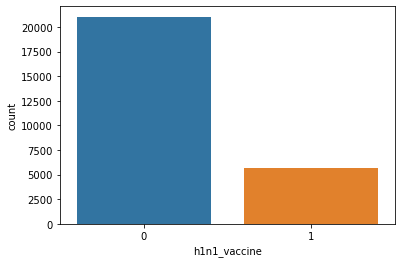

In [17]:
sns.countplot(x="h1n1_vaccine", data = training_joined )

In [18]:
training_joined.drop(columns=["hhs_geo_region","employment_industry","employment_occupation",
                              "seasonal_vaccine","doctor_recc_seasonal","opinion_seas_vacc_effective",
                             "opinion_seas_risk","opinion_seas_sick_from_vacc"], inplace = True)

In [21]:
test_set_feat.drop(columns=["hhs_geo_region","employment_industry","employment_occupation",
                            "doctor_recc_seasonal","opinion_seas_vacc_effective",
                             "opinion_seas_risk","opinion_seas_sick_from_vacc"], inplace = True)

In [22]:
def vaccination_rate_plot(col, target, data):
    
    counts = (training_joined[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh")

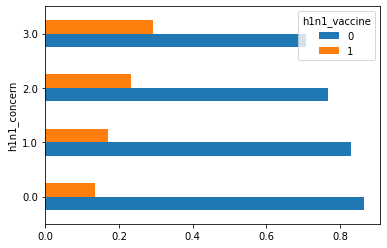

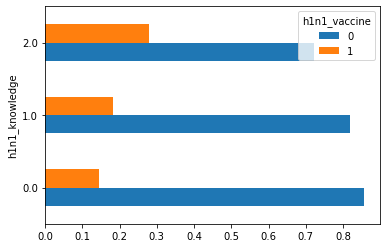

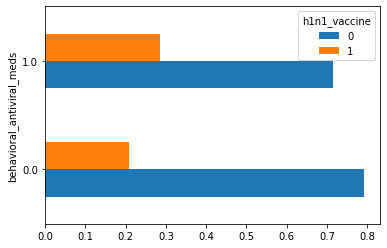

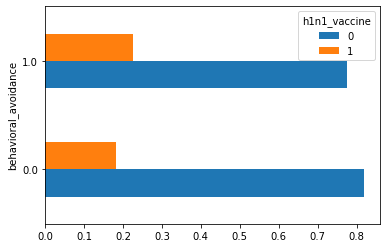

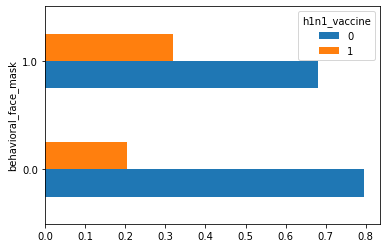

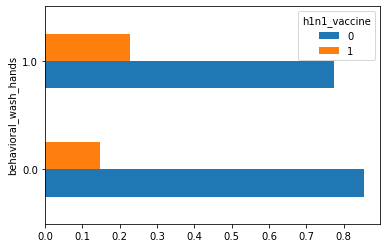

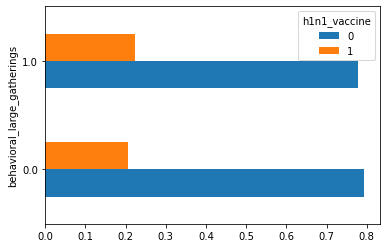

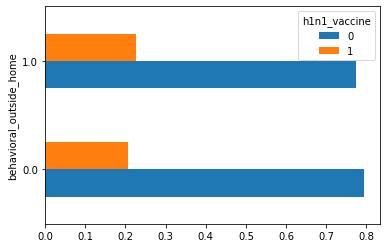

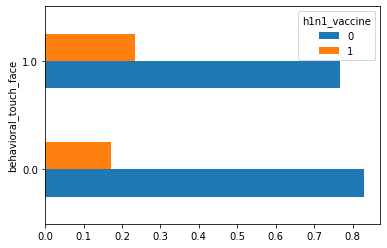

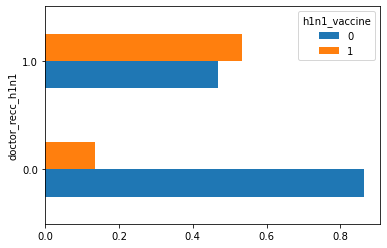

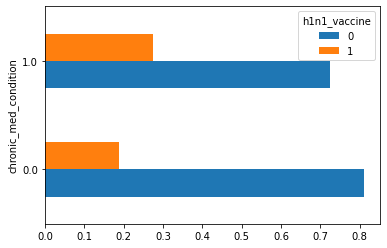

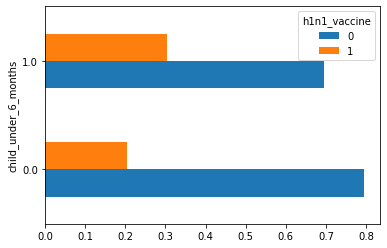

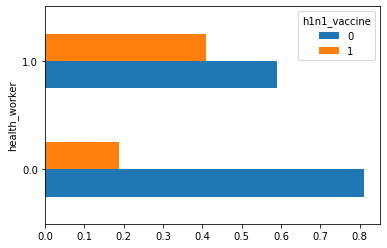

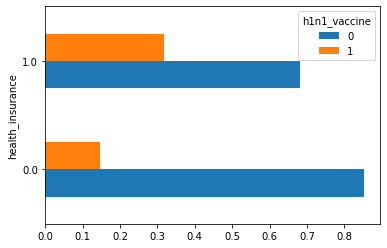

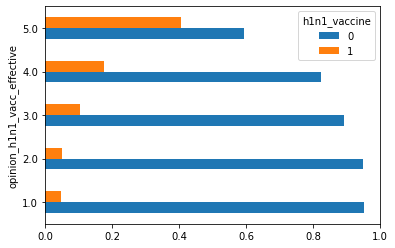

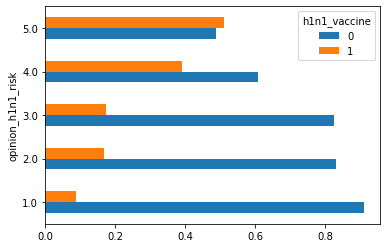

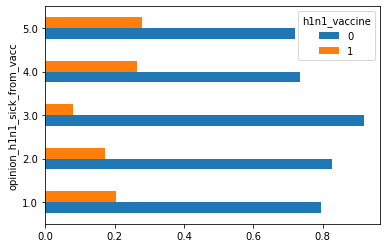

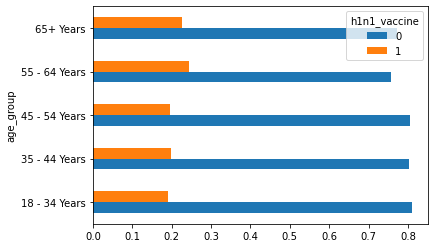

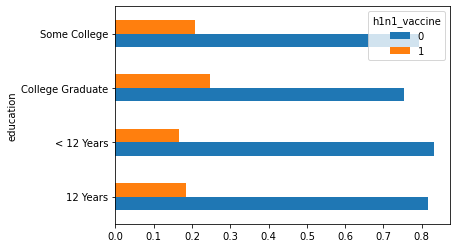

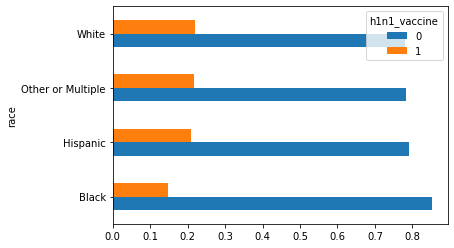

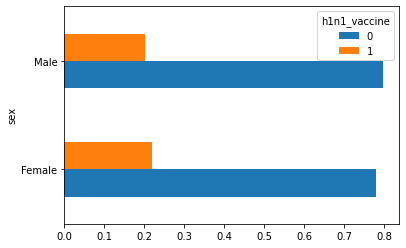

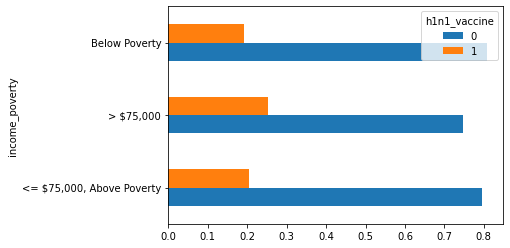

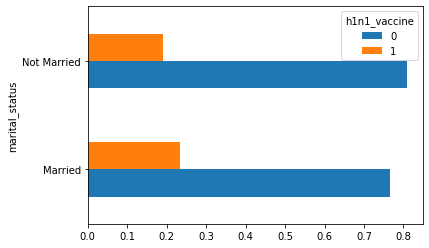

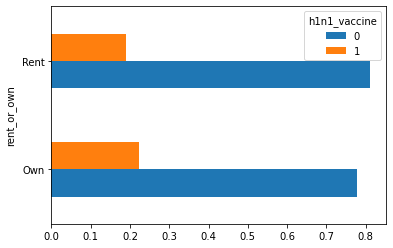

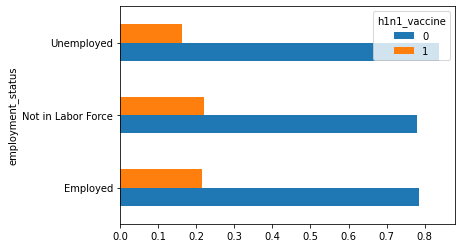

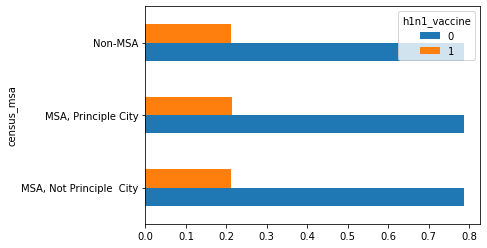

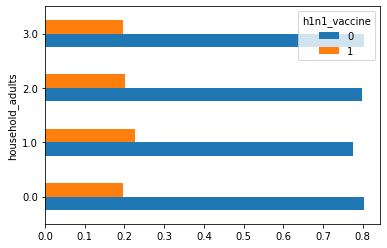

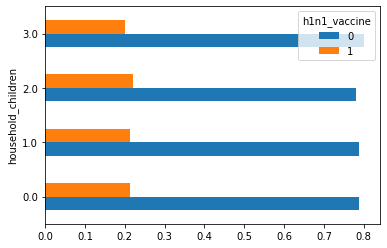

In [23]:
cols_to_plot = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'census_msa', 'household_adults', 'household_children']

for col in cols_to_plot:
    vaccination_rate_plot(col,"h1n1_vaccine",training_joined)

In [24]:
for col in training_joined.columns[training_joined.dtypes == "object"]:
    print(f'{col}:\n', training_joined[col].value_counts(normalize = True)*100, '\n')

age_group:
 65+ Years        25.622496
55 - 64 Years    20.829745
45 - 54 Years    19.612836
18 - 34 Years    19.526716
35 - 44 Years    14.408208
Name: age_group, dtype: float64 

education:
 College Graduate    39.909091
Some College        27.837945
12 Years            22.913043
< 12 Years           9.339921
Name: education, dtype: float64 

race:
 White                79.462313
Black                 7.930505
Hispanic              6.571311
Other or Multiple     6.035871
Name: race, dtype: float64 

sex:
 Female    59.377691
Male      40.622309
Name: sex, dtype: float64 

income_poverty:
 <= $75,000, Above Poverty    57.337103
> $75,000                    30.560043
Below Poverty                12.102854
Name: income_poverty, dtype: float64 

marital_status:
 Married        53.579193
Not Married    46.420807
Name: marital_status, dtype: float64 

rent_or_own:
 Own     75.961889
Rent    24.038111
Name: rent_or_own, dtype: float64 

employment_status:
 Employed              53.715734
No

In [25]:
training_joined.to_pickle("training_joined")

In [27]:
test_set_feat.to_pickle("test_set_feat")